## Time Series Analysis and Forecasting Using LSTM
------------------------------------------------

This script performs time-series forecasting using an LSTM model. It includes 
data preprocessing, exploratory data analysis (EDA), model training, cross-validation, 
and future forecasting. Additional performance metrics and placeholders for 
graphical outputs are included for better analysis.

Dependencies:
- NumPy
- Pandas
- Matplotlib
- TensorFlow 2.x
- Scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v2 as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
tf.enable_v2_behavior()
keras = tf.keras

# Step 1: Load and Preprocess the Dataset

- Load the time-series dataset from a CSV file.
- Normalize the dataset using MinMaxScaler to scale values between [0, 1].

In [4]:
# Load the dataset
data = pd.read_csv('US Unemployment Rate.csv')

In [5]:
# Extract time and series
time = data['DATE'].values
series = data['UNRATE'].values

In [6]:
# Normalize dataset to range [0, 1]
scaler = MinMaxScaler()
series = scaler.fit_transform(series.reshape(-1, 1)).flatten()

# Step 2: Perform Exploratory Data Analysis (EDA)

Placeholders for EDA visualizations:
1. Histogram of the series to analyze distribution.
2. Rolling mean and standard deviation to observe trends and variability.
3. Time-series line plot for the raw data.

In [ ]:
# 1. Exploratory Data Analysis (EDA)
plt.figure(figsize=(16, 12))

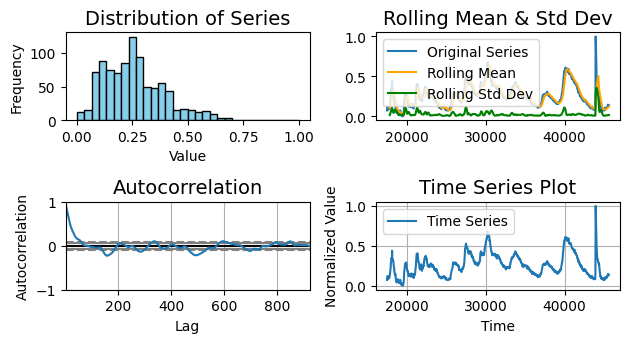

In [9]:
# Histogram
plt.subplot(3, 2, 1)
plt.hist(series, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Series", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Frequency")

# Rolling mean and standard deviation
rolling_mean = pd.Series(series).rolling(window=12).mean()
rolling_std = pd.Series(series).rolling(window=12).std()
plt.subplot(3, 2, 2)
plt.plot(time, series, label="Original Series")
plt.plot(time, rolling_mean, label="Rolling Mean", color='orange')
plt.plot(time, rolling_std, label="Rolling Std Dev", color='green')
plt.title("Rolling Mean & Std Dev", fontsize=14)
plt.legend()

# Autocorrelation plot
plt.subplot(3, 2, 3)
pd.plotting.autocorrelation_plot(pd.Series(series))
plt.title("Autocorrelation", fontsize=14)

# Time series plot
plt.subplot(3, 2, 4)
plt.plot(time, series, label="Time Series")
plt.title("Time Series Plot", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Define Helper Functions

Helper functions include:
- plot_series: To plot time-series data.
- window_dataset: To prepare data for the LSTM model in the sliding window format.
- create_lstm_model: To define the LSTM architecture.

In [10]:
# Plot series
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [11]:
# Define window dataset function
def window_dataset(series, window_size, batch_size=32, shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [12]:
# Hyperparameters
window_size = 30
batch_size = 32
shuffle_buffer = 1000

In [13]:

# Define LSTM Model
def create_lstm_model():
    model = keras.models.Sequential([
        keras.layers.LSTM(64, return_sequences=True, input_shape=[window_size, 1]),
        keras.layers.LSTM(32),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(
        loss=keras.losses.Huber(),
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["mae"]
    )
    return model

In [14]:
def plot_training_history(history):
    """Plot training and validation loss over epochs."""
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Step 4: Perform Cross-Validation

- Use TimeSeriesSplit for cross-validation.
- Train the LSTM model on each fold.
- Evaluate model performance using Mean Absolute Error (MAE).
- Compare actual vs forecasted values for each fold.

Placeholders for CV Visualizations:
1. Actual vs Predicted values for each fold.
2. Summary table or plot for CV performance (e.g., MAE across folds).

In [15]:
# Ensure no NaN or infinite values in the series
assert not np.any(np.isnan(series)), "Series contains NaN values!"
assert np.all(np.isfinite(series)), "Series contains infinite values!"

In [16]:
# 3. Cross-validation with detailed metrics
tscv = TimeSeriesSplit(n_splits=5)
window_size = 30
batch_size = 32
shuffle_buffer = 1000

cv_mae, cv_rmse, cv_r2 = [], [], []

In [29]:
def model_forecast(model, series, window_size):
    """Generate forecasts using the LSTM model."""
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


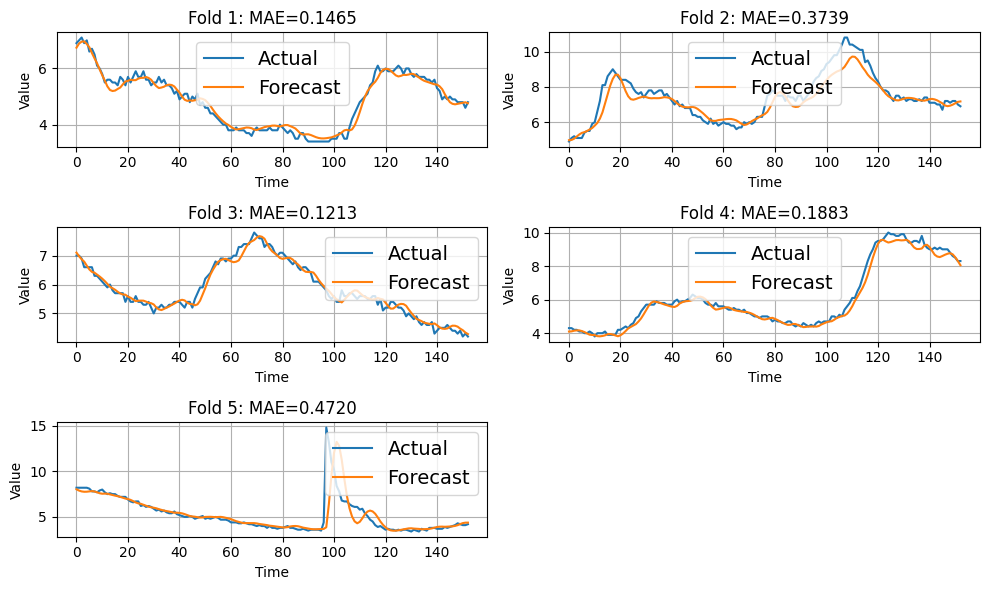

In [ ]:
plt.figure(figsize=(10, 6))  # Set figure size for visualization
for fold_idx, (train_idx, val_idx) in enumerate(tscv.split(series)):  # Loop through each split in time series cross-validation
    # Split the series into training and validation sets
    x_train, x_valid = series[train_idx], series[val_idx]
    
    # Create windowed datasets for training and validation
    train_set = window_dataset(x_train, window_size, batch_size, shuffle_buffer)
    valid_set = window_dataset(x_valid, window_size, batch_size, shuffle_buffer)

    # Initialize and compile the LSTM model
    model = create_lstm_model()

    # Use early stopping to prevent overfitting
    early_stopping = keras.callbacks.EarlyStopping(patience=10)  # Stops training if validation loss doesn't improve for 10 epochs

    # Train the model on the training set and validate it on the validation set
    history = model.fit(
        train_set,
        epochs=50,  # Train for up to 50 epochs
        validation_data=valid_set,  # Evaluate on validation set during training
        callbacks=[early_stopping],  # Apply early stopping
        verbose=0  # Suppress detailed output for clarity
    )
    
    # Forecast the validation set using the trained model
    forecast = model_forecast(
        model, 
        series[val_idx[0] - window_size:val_idx[-1] + 1],  # Input series for forecasting
        window_size
    ).flatten()

    # Inverse transform the forecast and actual validation data back to the original scale
    forecast_actual = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()
    x_valid_actual = scaler.inverse_transform(x_valid.reshape(-1, 1)).flatten()

    # Ensure forecast and actual validation lengths match for comparison
    min_len = min(len(forecast_actual), len(x_valid_actual))  # Find the shorter length
    forecast_actual = forecast_actual[:min_len]  # Trim forecast to match
    x_valid_actual = x_valid_actual[:min_len]  # Trim actual validation data to match
    
    # Calculate the Mean Absolute Error (MAE) for this fold
    mae = keras.metrics.mean_absolute_error(x_valid_actual, forecast_actual).numpy()
    cv_mae.append(mae)  # Store MAE for cross-validation metrics

    # Plot the actual vs forecast values for this fold
    plt.subplot(3, 2, fold_idx + 1)  # Create a subplot for each fold (3x2 grid)
    plot_series(np.arange(len(x_valid_actual)), x_valid_actual, label="Actual")  # Plot actual values
    plot_series(np.arange(len(forecast_actual)), forecast_actual, label="Forecast")  # Plot forecast values
    plt.title(f"Fold {fold_idx + 1}: MAE={mae:.4f}")  # Add fold number and MAE to the subplot title

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()  # Render the visualization


In [26]:
print(f"Cross-Validation Metrics:")
print(f"Mean MAE: {np.mean(cv_mae):.4f}, Mean RMSE: {np.mean(cv_rmse):.4f}, Mean R²: {np.mean(cv_r2):.4f}")

Cross-Validation Metrics:
Mean MAE: 0.8848, Mean RMSE: 1.9767, Mean R²: -1.5226


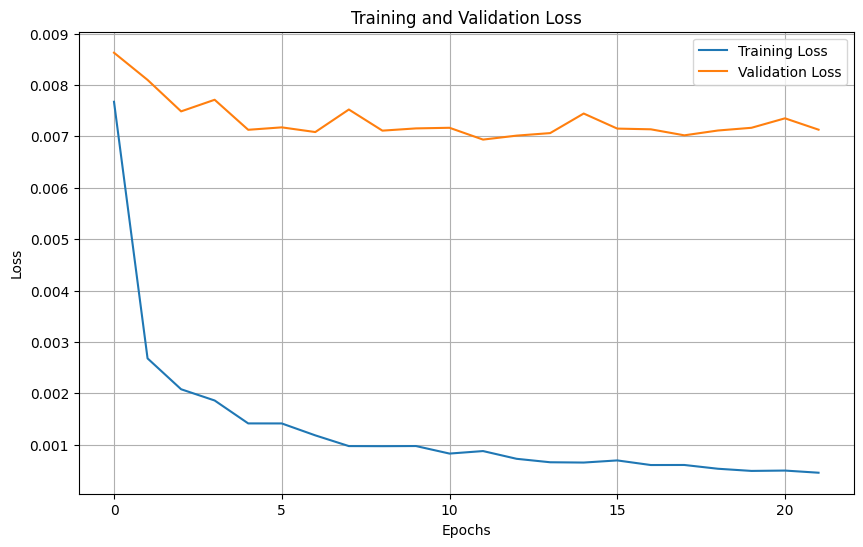

In [22]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Step 5: Retrain on Full Dataset and Forecast Future Values

- Retrain the model on the entire dataset.
- Forecast future values (e.g., next 12 steps).
- Compare historical data and future predictions.

Placeholders for Visualizations:
1. Plot training loss and validation loss over epochs.
2. Historical data vs future predictions plot.

In [23]:
# Retrain on the entire dataset
train_set = window_dataset(series, window_size, batch_size, shuffle_buffer)
model = create_lstm_model()
history = model.fit(train_set, epochs=100, verbose=0)

c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ENVY 13TH GEN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [24]:
# Forecast future values
future_steps = 12  # Predict for 12 future steps
future_time = np.arange(time[-1] + 1, time[-1] + 1 + future_steps)
future_series = np.append(series, np.zeros(future_steps))  # Placeholder for predictions

In [25]:
for i in range(future_steps):
    input_window = future_series[-window_size:].reshape(1, window_size, 1)
    future_series[-future_steps + i] = model.predict(input_window).flatten()

future_series_actual = scaler.inverse_transform(future_series.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\ENVY 13TH GEN\AppData\Local\Temp\ipykernel_10840\1598177683.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_series[-future_steps + i] = model.predict(input_window).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


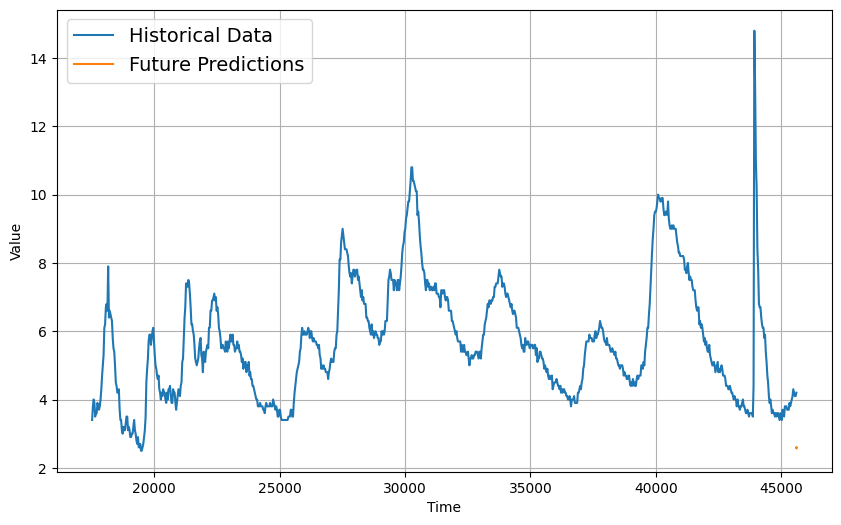

In [104]:
# Plot future predictions
plt.figure(figsize=(10, 6))
plot_series(time, scaler.inverse_transform(series.reshape(-1, 1)).flatten(), label="Historical Data")
plot_series(future_time, future_series_actual[-future_steps:], label="Future Predictions")
plt.show()

In [ ]:
# export model uisng model.save in keras
model.save("unemployment_rate_model.h5")
print("Model saved to unemployment_rate_model.h5")